In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import time

In [2]:
## Loading datasets
def load_datasets():
    datasetA, metaA = arff.loadarff(open('R15.arff','r'))
    datasetB, metaB = arff.loadarff(open('cluto-t8-8k.arff','r'))
    datasetC, metaC = arff.loadarff(open('spiralsquare.arff','r'))
    datasetD, metaD = arff.loadarff(open('elly-2d10c13s.arff','r'))
    datasetE, metaE = arff.loadarff(open('cure-t2-4k.arff','r'))
    datasetF, metaF = arff.loadarff(open('square5.arff','r'))
    datasetG, metaG = arff.loadarff(open('rings.arff','r'))
    datasetH, metaH = arff.loadarff(open('disk-1000n.arff','r'))
    
    return ([datasetA, datasetB, datasetC, datasetD, datasetE, datasetF, datasetG, datasetH],[metaA, metaB, metaC, metaD, metaE, metaF, metaG, metaH])

In [3]:
data, metadata = load_datasets()

In [23]:
print(data[1])
print(metadata[0])

[( 84.768997,  33.368999, b'1') (569.791016,  55.458   , b'2')
 (657.622986,  47.035   , b'4') ... ( 37.887001,  79.575996, b'1')
 (175.552994,  76.314003, b'1') (226.192001, 115.615997, b'0')]
Dataset: R15
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15')



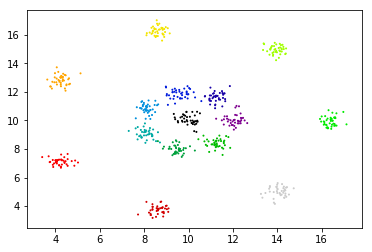

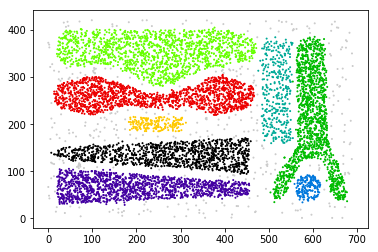

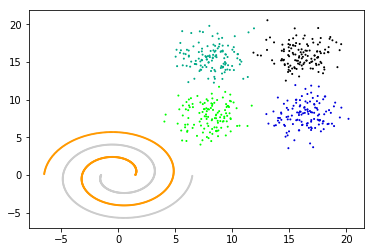

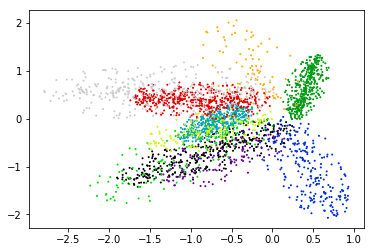

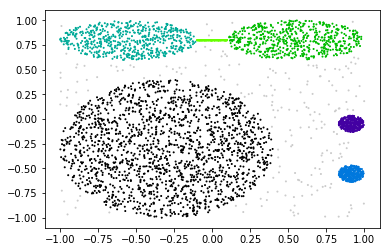

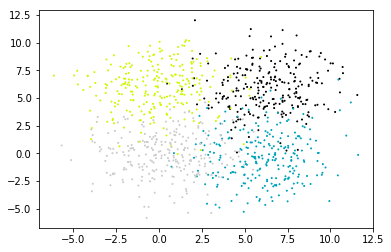

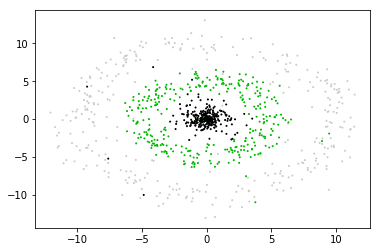

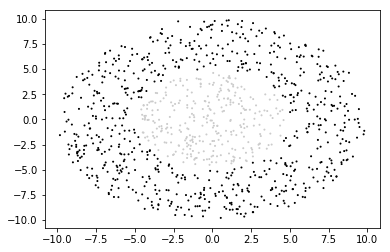

In [13]:
def plot_datasets(datasets, metas):
    for i in range(len(datasets)):
        dataset = datasets[i]
        meta = metas[i]
        try:
            plt.scatter(dataset[meta.names()[0]],
                    dataset[meta.names()[1]],
                    c = dataset[meta.names()[2]],
                    s = 1, cmap = 'nipy_spectral')
        except ValueError:
            plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = [int(s) if s.isdigit() else 8 for str in dataset[meta.names()[2]] for s in str.split()],
                        s = 1, cmap = 'nipy_spectral')
        plt.show()
plot_datasets(data,metadata)

In [32]:
### Kmeans iteratif sur dataset
def kmeans_iteratif(dataset, nb_max=50):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    klabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for k in range(2,nb_max):
        start_time = time.time()
        kmeans = KMeans(n_clusters=k, init='k-means++').fit(X)
        elapsed = time.time() - start_time
        labels = kmeans.labels_
        klabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_k_sil = sil_score.index(min(sil_score)) + 2
    best_k_db = db_score.index(min(db_score)) + 2
    best_k_chi = chi_score.index(max(chi_score)) + 2

    plt.plot(range(2,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(2,nb_max),db_score,label = "DB index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.title("Score with silhouette coefficient and DB index")
    plt.show()

    plt.plot(range(2,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.title("Score with Calinski and Harabasz index")
    plt.show()

    plt.plot(range(2,nb_max),duration, label = "Execution time")
    plt.xlabel('k')
    plt.ylabel('time')
    plt.title("Execution time")
    plt.show()
      
    return ((best_k_sil, best_k_db, best_k_chi),klabels)

Dataset: R15
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

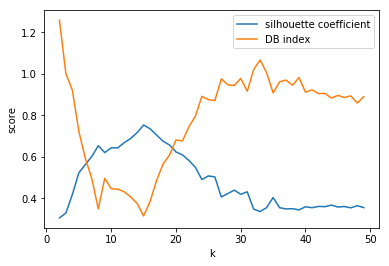

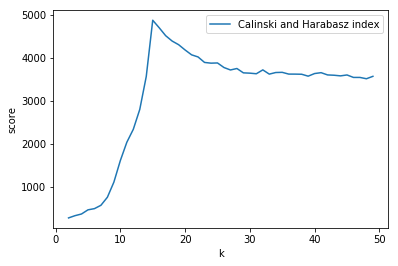

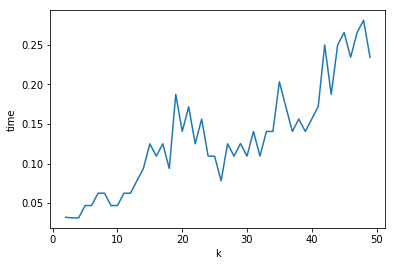

best k with silhouette coefficient:  2
best k with DB index:  15
best k with Calinski and Harabasz index:  15


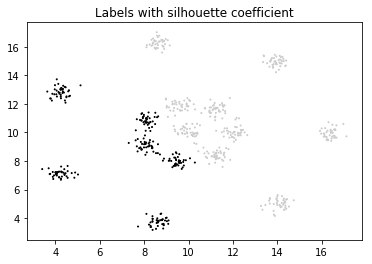

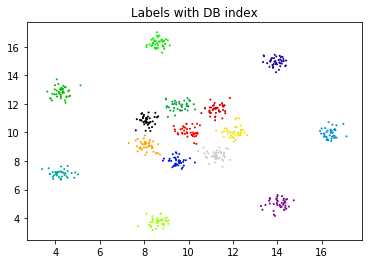

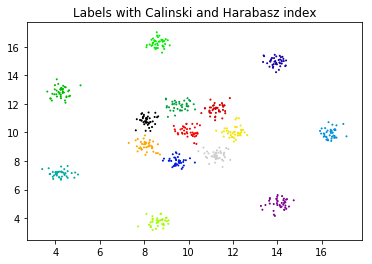

Dataset: cluto-t8-8k
	x's type is numeric
	y's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', 'noise')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

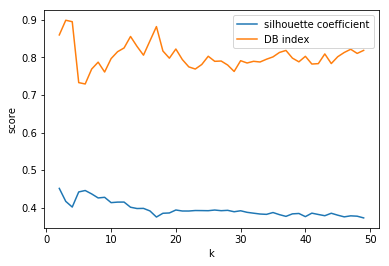

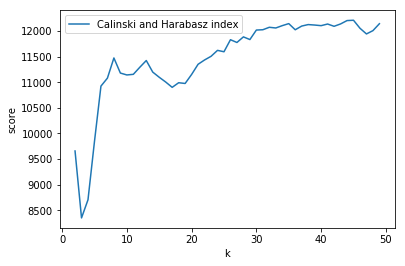

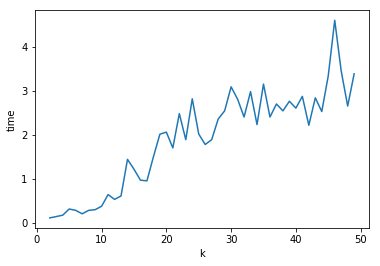

best k with silhouette coefficient:  49
best k with DB index:  6
best k with Calinski and Harabasz index:  45


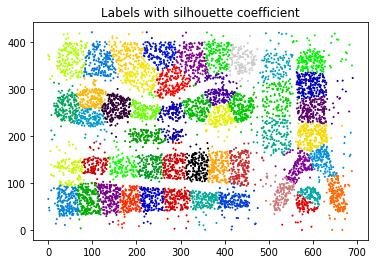

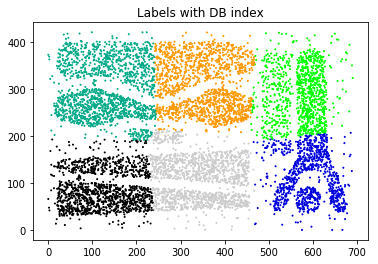

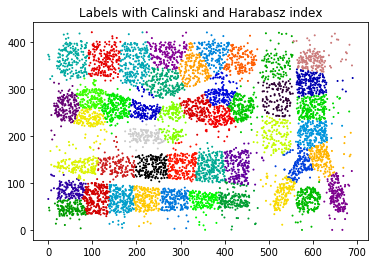

Dataset: spiralsquare
	a0's type is numeric
	a1's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

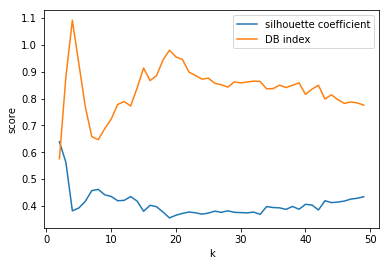

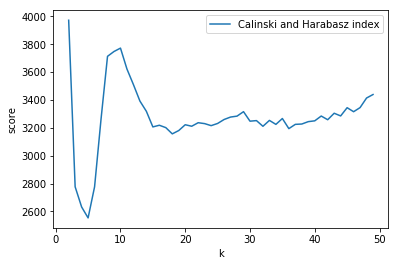

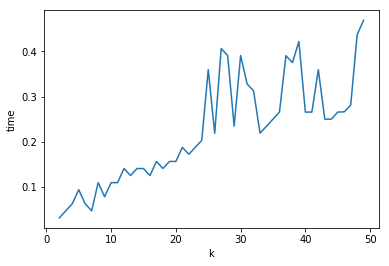

best k with silhouette coefficient:  19
best k with DB index:  2
best k with Calinski and Harabasz index:  2


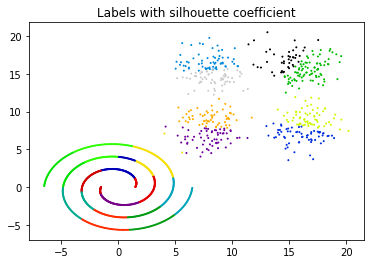

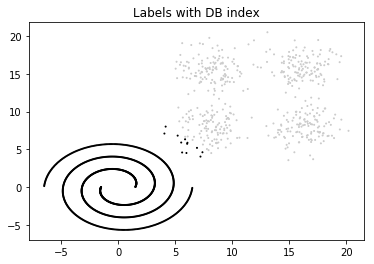

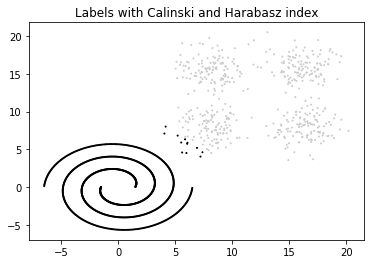

Dataset: elly-2d5c13s
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

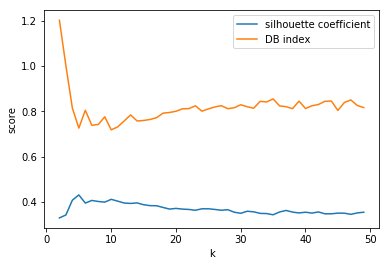

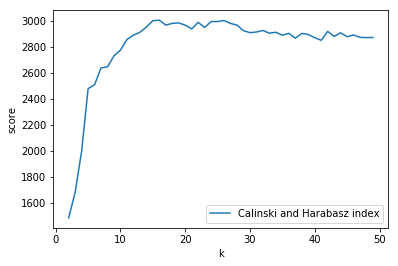

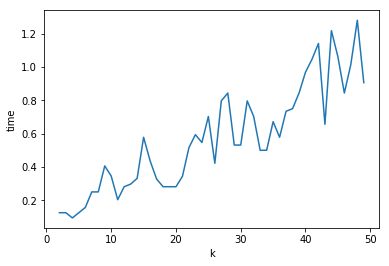

best k with silhouette coefficient:  2
best k with DB index:  10
best k with Calinski and Harabasz index:  16


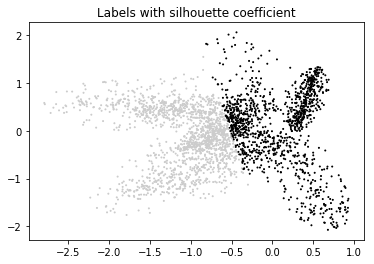

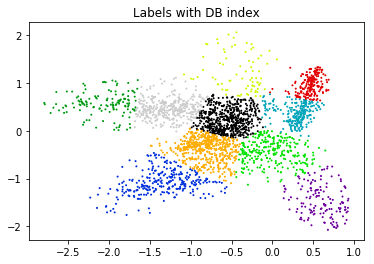

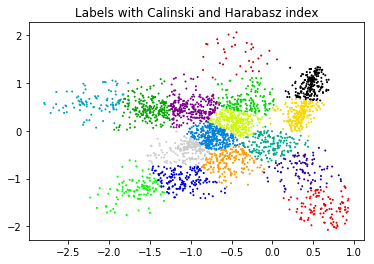

Dataset: cure-t2-4k
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3', '4', '5', 'noise')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

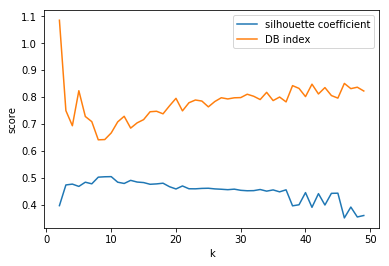

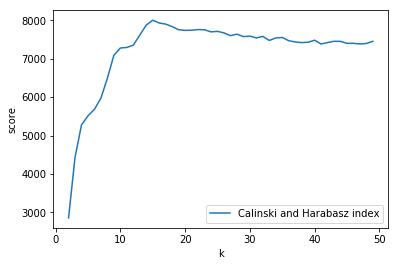

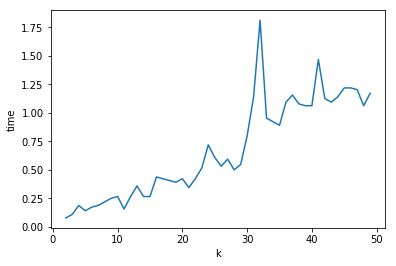

best k with silhouette coefficient:  46
best k with DB index:  8
best k with Calinski and Harabasz index:  15


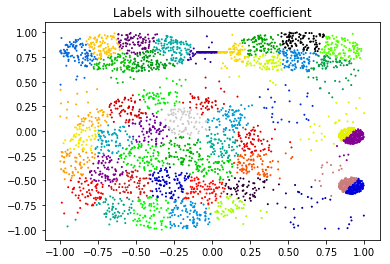

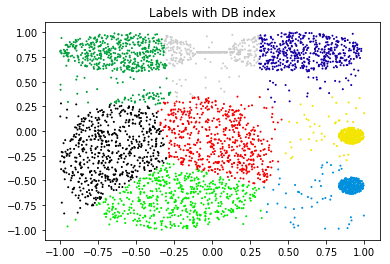

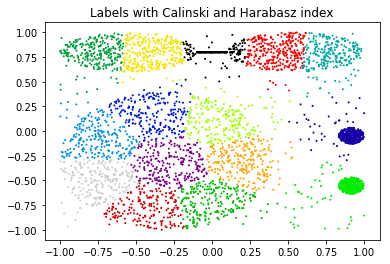

Dataset: square5
	a0's type is numeric
	a1's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

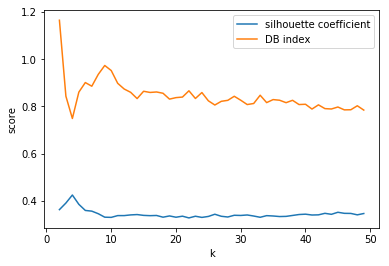

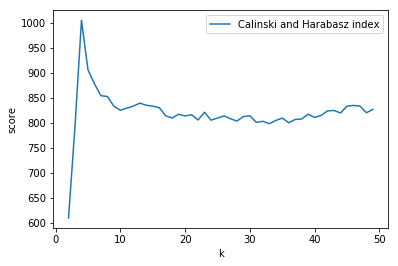

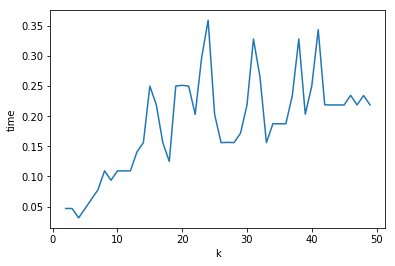

best k with silhouette coefficient:  22
best k with DB index:  4
best k with Calinski and Harabasz index:  4


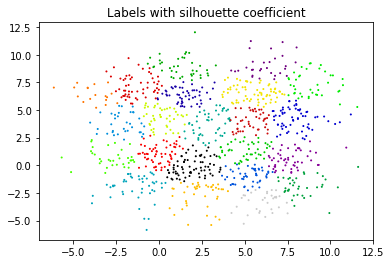

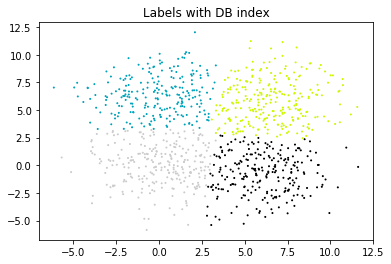

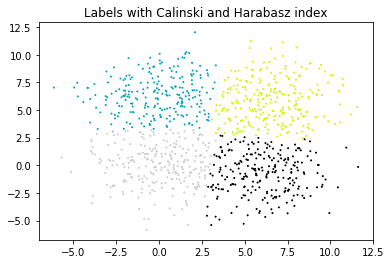

Dataset: Rings
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

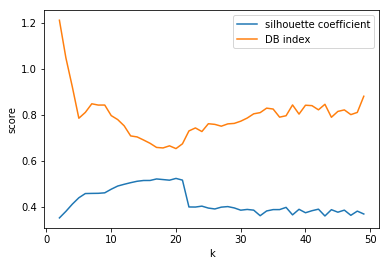

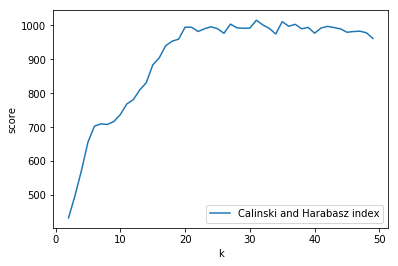

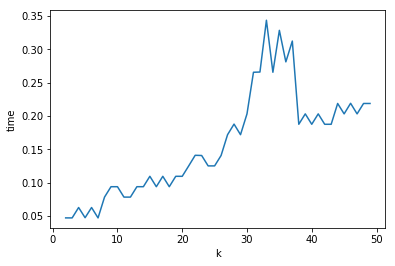

best k with silhouette coefficient:  2
best k with DB index:  20
best k with Calinski and Harabasz index:  31


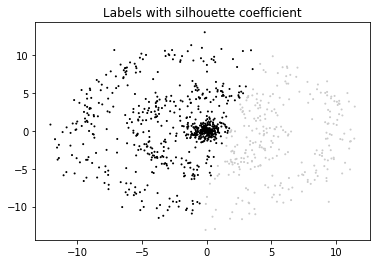

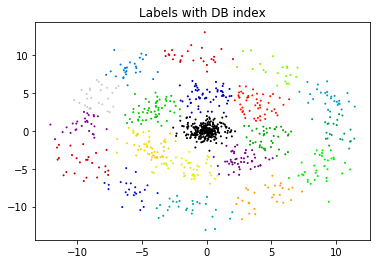

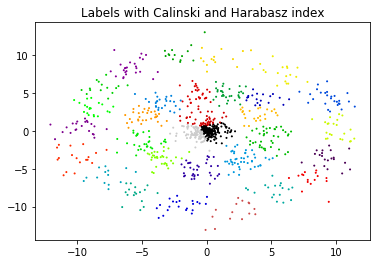

Dataset: disk-1000n
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1')



C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

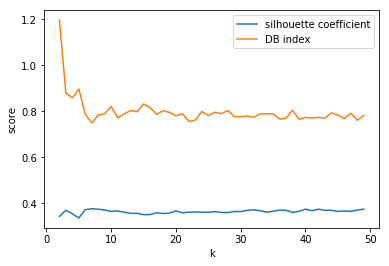

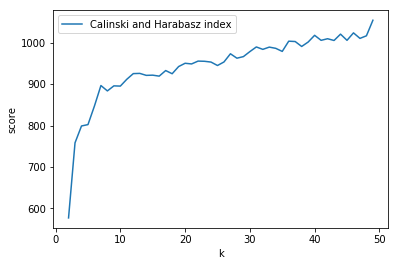

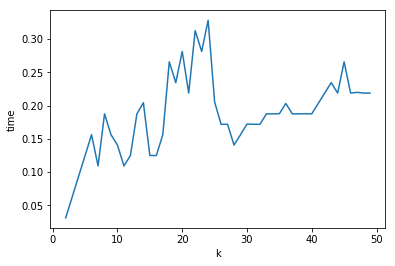

best k with silhouette coefficient:  5
best k with DB index:  7
best k with Calinski and Harabasz index:  49


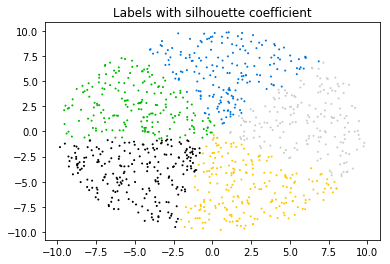

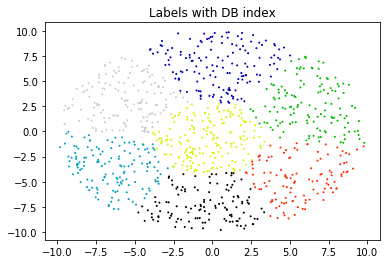

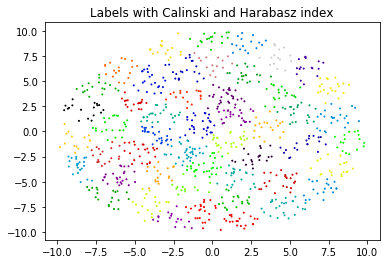

In [33]:
for i in range(len(data)):
    dataset = data[i]
    meta = metadata[i]
    print(meta)
    ((k_sil,k_db,k_chi),klabels) = kmeans_iteratif(dataset)
    print("best k with silhouette coefficient: ", k_sil)
    print("best k with DB index: ", k_db)
    print("best k with Calinski and Harabasz index: ", k_chi)
    best_labels_sil = klabels[k_sil-2]
    best_labels_db = klabels[k_db-2]
    best_labels_chi = klabels[k_chi-2]
    plt.scatter(dataset[meta.names()[0]],
                    dataset[meta.names()[1]],
                    c = best_labels_sil,
                    s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with silhouette coefficient")
    plt.show()
    
    plt.scatter(dataset[meta.names()[0]],
                    dataset[meta.names()[1]],
                    c = best_labels_db,
                    s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with DB index")
    plt.show()
    
    plt.scatter(dataset[meta.names()[0]],
                    dataset[meta.names()[1]],
                    c = best_labels_chi,
                    s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with Calinski and Harabasz index")
    plt.show()
    